<a href="https://colab.research.google.com/github/OmerTurk1/ML-From-Scratch/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

In [2]:
def func(vals1, vals2):
  return (2*vals1-3*vals2>=40).astype(int)

In [3]:
def create_dataset(n=300):
    vals1 = np.random.randint(1, 151, size=n)
    vals2 = np.random.randint(1, 151, size=n)
    df = pd.DataFrame({
        "val1": vals1,
        "val2": vals2
    })
    df["cls"] = func(df["val1"],df["val2"])
    return df

In [4]:
df = create_dataset()
df.head()

,val1,val2,cls
0,34,113,0
1,129,9,1
2,51,116,0
3,35,5,1
4,108,118,0


Text(0.5, 1.0, 'cls diagram')

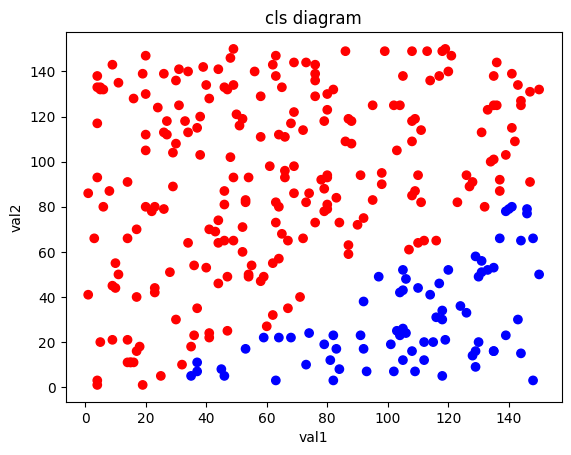

In [5]:
colors = df.cls.map({1: "blue", 0: "red"}).fillna("gray")
plt.scatter(df.val1, df.val2, c=colors)
plt.xlabel("val1")
plt.ylabel("val2")
plt.title("cls diagram")

In [6]:
class Logis_Reg:
    def __init__(self, iter=100, a=0.001):
        self.Q = None
        self.iter = iter
        self.a = a
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    def predict(self, X):
        X = X.copy()
        X["bias"] = 1
        preds = self.sigmoid(X@self.Q)
        return (preds >= 0.5).astype(int)
    def log_likelihood(self, X, Y):
        preds = self.sigmoid(np.dot(X, self.Q))
        return (Y @ np.log(preds) + (1 - Y) @ np.log(1 - preds))
    def gradient(self, X, Y):
        preds = self.sigmoid(np.dot(X, self.Q))
        grad = np.dot(X.T, (preds - Y))/X.shape[0]
        self.Q -= self.a * grad
    def fit(self, X, Y):
        X = X.copy()
        X["bias"] = 1
        self.Q = np.zeros(X.shape[1])
        for i in range(self.iter):
            self.gradient(X, Y)
            print(f"Iter {i}: Log likelihood = {self.log_likelihood(X, Y)}")

In [7]:
X=df.drop(columns="cls")
Y=df["cls"]

In [8]:
logi = Logis_Reg()
logi.fit(X,Y)

Iter 0: Log likelihood = -181.8979355700361
Iter 1: Log likelihood = -90.7844377221926
Iter 2: Log likelihood = -80.71143952166344
Iter 3: Log likelihood = -73.80477899750474
Iter 4: Log likelihood = -68.79528588031002
Iter 5: Log likelihood = -64.95502954320996
Iter 6: Log likelihood = -61.882444469132125
Iter 7: Log likelihood = -59.34599732108178
Iter 8: Log likelihood = -57.20502389464712
Iter 9: Log likelihood = -55.36667141366716
Iter 10: Log likelihood = -53.76617167138606
Iter 11: Log likelihood = -52.35662384207072
Iter 12: Log likelihood = -51.103118971367266
Iter 13: Log likelihood = -49.97906539479355
Iter 14: Log likelihood = -48.96380474299551
Iter 15: Log likelihood = -48.04101241865149
Iter 16: Log likelihood = -47.19759517294044
Iter 17: Log likelihood = -46.422912999055406
Iter 18: Log likelihood = -45.708218349817756
Iter 19: Log likelihood = -45.04624442897343
Iter 20: Log likelihood = -44.43089789062333
Iter 21: Log likelihood = -43.85702603889627
Iter 22: Log like

In [9]:
test = create_dataset(n=300)
test_x=test.drop(columns="cls")
test_y=test["cls"]
result=(logi.predict(test_x)==test_y).astype(int).mean()
print("Accuracy:",result)

Accuracy: 0.97
